Task1: Stock Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv('goog.csv')
stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [4]:
stock_data=stock_data[['date','open','close']]
stock_data['date']=pd.to_datetime(stock_data['date'].apply(lambda x: x.split()[0]))
stock_data.set_index('date',drop=True,inplace=True)
stock_data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


Data Pre-Processing

In [5]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
stock_data[stock_data.columns]=MMS.fit_transform(stock_data)

In [6]:
stock_data.shape

(1258, 2)

In [7]:
training_size=round(len(stock_data)*0.80)
training_size

1006

In [8]:
train_data = stock_data[:training_size]
test_data = stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [9]:
def create_sequence(dataset):
    sequences = []
    labels = []

    start_idx = 0

    for stop_idx in range(50,len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))

In [10]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [11]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

Creating LSTM model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label),verbose=1)

Epoch 1/80
30/30 [==============================] - 50s 392ms/step - loss: 0.0097 - mean_absolute_error: 0.0688 - val_loss: 0.0191 - val_mean_absolute_error: 0.1218
Epoch 2/80
30/30 [==============================] - 6s 207ms/step - loss: 9.6443e-04 - mean_absolute_error: 0.0248 - val_loss: 0.0029 - val_mean_absolute_error: 0.0425
Epoch 3/80
30/30 [==============================] - 6s 214ms/step - loss: 5.6872e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0020 - val_mean_absolute_error: 0.0361
Epoch 4/80
30/30 [==============================] - 7s 243ms/step - loss: 5.4267e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0016 - val_mean_absolute_error: 0.0336
Epoch 5/80
30/30 [==============================] - 6s 205ms/step - loss: 5.3038e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0023 - val_mean_absolute_error: 0.0382
Epoch 6/80
30/30 [==============================] - 6s 209ms/step - loss: 5.1527e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0019 - val_mean_absolute_error: 0.

In [15]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 8s 55ms/step


array([[0.48387507, 0.49333245],
       [0.49159488, 0.50091773],
       [0.49690098, 0.50612515],
       [0.50975746, 0.51883733],
       [0.52140385, 0.53042495]], dtype=float32)

In [16]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1568.0657, 1582.5728],
       [1582.3776, 1596.6309],
       [1592.2147, 1606.282 ],
       [1616.0496, 1629.842 ],
       [1637.641 , 1651.3179]], dtype=float32)

Visualizing Predicted and Actual Data

In [17]:
gs_slic_data=pd.concat([stock_data.iloc[-202:].copy(),pd.DataFrame
(test_inverse_predicted, columns=['open_predicted', 'close_predicted'],index=stock_data.iloc[-202:].index)],axis=1)

In [18]:
gs_slic_data[['open', 'close']]=MMS.inverse_transform(gs_slic_data[['open', 'close']])

In [19]:
gs_slic_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1568.065674,1582.572754
2020-08-25,1582.07,1608.22,1582.377563,1596.630859
2020-08-26,1608.00,1652.38,1592.214722,1606.281982
2020-08-27,1653.68,1634.33,1616.049561,1629.842041
2020-08-28,1633.49,1644.41,1637.640991,1651.317871


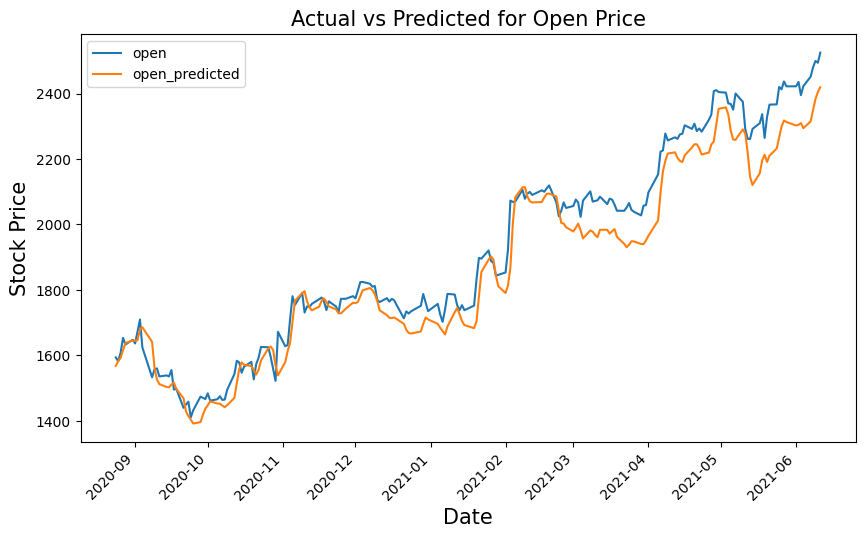

In [20]:
gs_slic_data[['open', 'open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open Price',size=15)
plt.show()

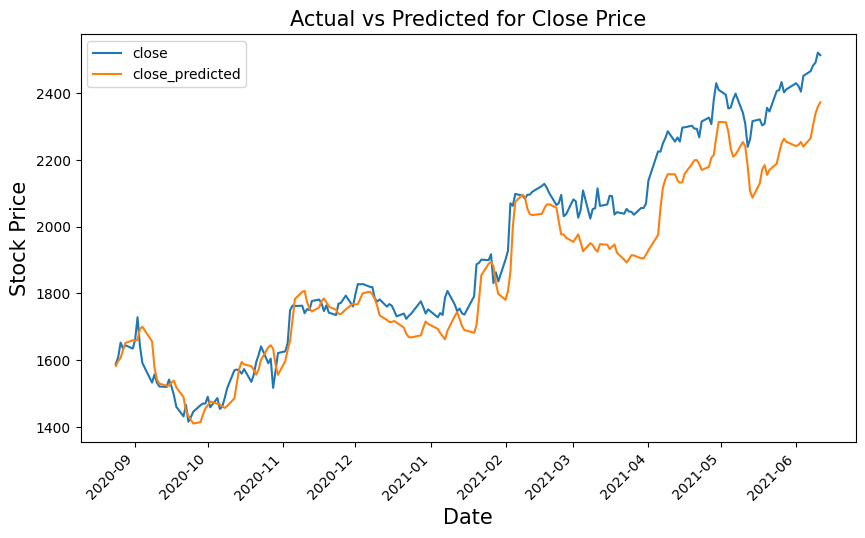

In [21]:
gs_slic_data[['close', 'close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close Price',size=15)
plt.show()

In [23]:
gs_slic_data['2021-06-09    ':'2021-06-11']

,open,close,open_predicted,close_predicted
date,,,,
2021-06-09,2499.50,2491.40,2382.993896,2338.818604
2021-06-10,2494.01,2521.60,2404.709473,2359.453125
2021-06-11,2524.92,2513.93,2419.277100,2372.478516


In [24]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [25]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
    up_pred = model.predict(curr_seq)
    upcoming_prediction.iloc[i] = up_pred
    curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
    curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 153ms/step


In [26]:
upcoming_prediction[['open','close']]=MMS.inverse_transform(upcoming_prediction[['open','close']])

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_28072\1468221403.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


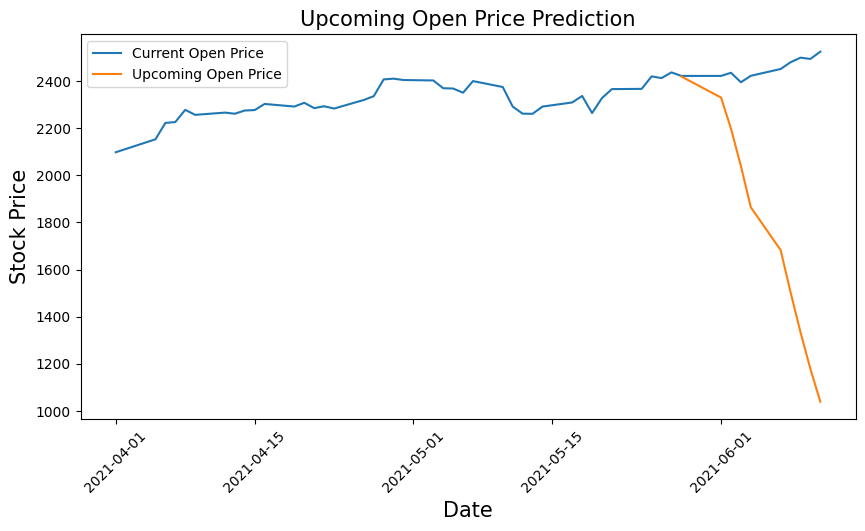

In [27]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01' :,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01' :,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open Price Prediction',size=15)
ax.legend()
fg.show()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_28072\3591204608.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


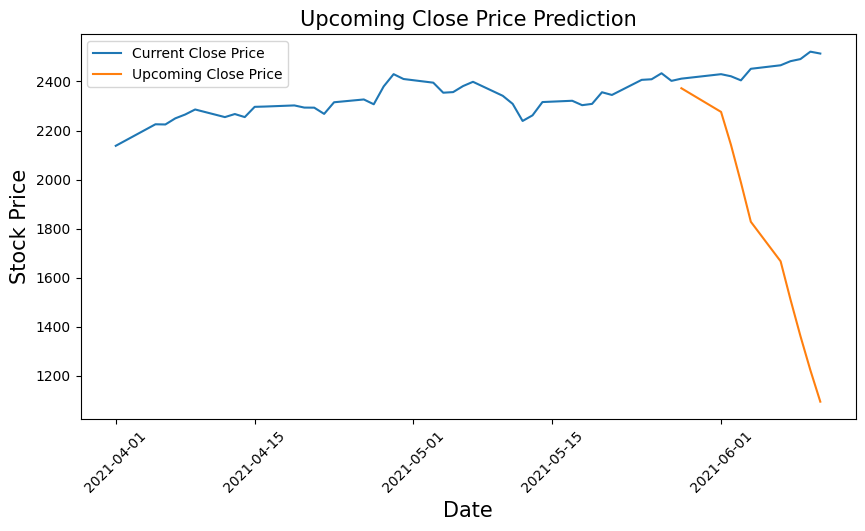

In [28]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01' :,'close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2021-04-01' :,'close'],label='Upcoming Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Close Price Prediction',size=15)
ax.legend()
fg.show()